Logistic Regression 

## Objectives

After completing this lab you will be able to:

*   Use scikit Logistic Regression to classify
*   Understand confusion matrix


<a id="ref1"></a>

## What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, used when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression function and transforming the numeric estimate into a probability with the following function, which is called the sigmoid function 𝜎:

$$
ℎ\_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta\_0 + \theta\_1  x\_1 + \theta\_2  x\_2 +...)}}{1 + e^{(\theta\_0 + \theta\_1  x\_1 + \theta\_2  x\_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass\_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}}
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">

The objective of the **Logistic Regression** algorithm, is to find the best parameters θ, for $ℎ\_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.

In [1]:
!pip install scikit-learn==0.23.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 5.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

<h2 id="about_dataset">About the dataset</h2>
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*   Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents

In [3]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")
display(df)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [4]:
churn_df = df[['tenure', 'age', 'address', 'income']]
churn_df['income'] = churn_df['income'].astype('int')
churn_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tenure,age,address,income
0,11.0,33.0,7.0,136
1,33.0,33.0,12.0,33
2,23.0,30.0,9.0,30
3,38.0,35.0,5.0,76
4,7.0,35.0,14.0,80


In [5]:
X = np.asanyarray(churn_df[['tenure', 'age', 'address', 'income']])
X[0:5]

array([[ 11.,  33.,   7., 136.],
       [ 33.,  33.,  12.,  33.],
       [ 23.,  30.,   9.,  30.],
       [ 38.,  35.,   5.,  76.],
       [  7.,  35.,  14.,  80.]])

In [6]:
y = np.asanyarray(df['churn'])
y [0:5]

array([1., 1., 0., 0., 0.])

Also, we normalize the dataset:

In [7]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451]])

## Train/Test dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 4) (160,)
Test set: (40, 4) (40,)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [17]:
yhat = LR.predict(X_test)
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0.])

**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [11]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.5977768 , 0.4022232 ],
       [0.56107912, 0.43892088],
       [0.50596735, 0.49403265],
       [0.58353634, 0.41646366],
       [0.54570682, 0.45429318],
       [0.50669861, 0.49330139],
       [0.51759306, 0.48240694],
       [0.54007336, 0.45992664],
       [0.47670896, 0.52329104],
       [0.60062903, 0.39937097],
       [0.64401478, 0.35598522],
       [0.64317531, 0.35682469],
       [0.44345131, 0.55654869],
       [0.49208001, 0.50791999],
       [0.57517166, 0.42482834],
       [0.55587005, 0.44412995],
       [0.59708117, 0.40291883],
       [0.56344291, 0.43655709],
       [0.57515736, 0.42484264],
       [0.51949283, 0.48050717],
       [0.57308371, 0.42691629],
       [0.59592059, 0.40407941],
       [0.60239628, 0.39760372],
       [0.58035783, 0.41964217],
       [0.53254911, 0.46745089],
       [0.66725746, 0.33274254],
       [0.5396121 , 0.4603879 ],
       [0.5646213 , 0.4353787 ],
       [0.48685578, 0.51314422],
       [0.67942928, 0.32057072],
       [0.

confusion matrix

Example diagram 

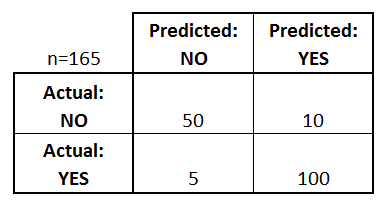

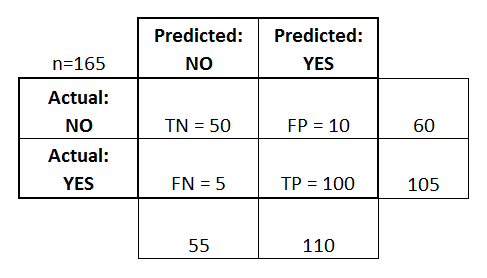

Accuracy: Overall, how often is the classifier correct?
(TP+TN)/total = (100+50)/165 = 0.91

Confusion matrix in our case 

In [12]:
confusion_matrix(y_test, yhat)

array([[23,  2],
       [10,  5]])

compute the accuracy of the classifier using the formula given above 

In [19]:
#start here 
accuracy= 28/40
print(accuracy)



0.7


<h1>Project 2 </h1>


To perform logistic regression using the following data set.

Use the feature sets given below to construct a logistic regression model 
 'ed', 'employ', 'equip',   'callcard', 'wireless'

In [35]:
dff=df[["ed","employ","equip","callcard","wireless"]]
display(dff)
X = np.asanyarray(dff[["ed","employ","equip","callcard","wireless"]])
print(X[0:5])
y = np.asanyarray(df['churn'])
y [0:5]
# please remember to train and test your model according to the feature set selected 


,ed,employ,equip,callcard,wireless
0,5.0,5.0,0.0,1.0,1.0
1,2.0,0.0,0.0,0.0,0.0
2,1.0,2.0,0.0,0.0,0.0
3,2.0,10.0,1.0,1.0,1.0
4,2.0,15.0,0.0,1.0,0.0
...,...,...,...,...,...
195,1.0,23.0,0.0,1.0,0.0
196,1.0,7.0,0.0,1.0,0.0
197,1.0,10.0,0.0,1.0,0.0
198,4.0,5.0,0.0,1.0,1.0


[[ 5.  5.  0.  1.  1.]
 [ 2.  0.  0.  0.  0.]
 [ 1.  2.  0.  0.  0.]
 [ 2. 10.  1.  1.  1.]
 [ 2. 15.  0.  1.  0.]]


array([1., 1., 0., 0., 0.])

In [36]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.6961288 , -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.6433592 , -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-1.42318853, -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [-0.6433592 , -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-0.6433592 ,  0.53441472, -0.85972695,  0.64686916, -0.63910148]])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 5) (160,)
Test set: (40, 5) (40,)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [40]:
yhat = LR.predict(X_test)
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1.])

In [41]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.56628588, 0.43371412],
       [0.56512867, 0.43487133],
       [0.5692309 , 0.4307691 ],
       [0.66540031, 0.33459969],
       [0.53373132, 0.46626868],
       [0.64105839, 0.35894161],
       [0.5218807 , 0.4781193 ],
       [0.58920219, 0.41079781],
       [0.45274683, 0.54725317],
       [0.56448138, 0.43551862],
       [0.48367103, 0.51632897],
       [0.5377661 , 0.4622339 ],
       [0.61409713, 0.38590287],
       [0.45624138, 0.54375862],
       [0.70304928, 0.29695072],
       [0.53491585, 0.46508415],
       [0.45624138, 0.54375862],
       [0.44860984, 0.55139016],
       [0.44229245, 0.55770755],
       [0.60276889, 0.39723111],
       [0.49305494, 0.50694506],
       [0.46039879, 0.53960121],
       [0.64369144, 0.35630856],
       [0.48080925, 0.51919075],
       [0.50260065, 0.49739935],
       [0.67474799, 0.32525201],
       [0.48015564, 0.51984436],
       [0.4885077 , 0.5114923 ],
       [0.54358463, 0.45641537],
       [0.66853111, 0.33146889],
       [0.

In [42]:
confusion_matrix(y_test, yhat)

array([[18,  7],
       [ 9,  6]])

In [43]:
acc=(18+6)/40
print(acc)

0.6


Use the feature sets given below to construct a logistic regression model 
 'ed', 'employ', 'equip',   'callcard', 'wireless','tenure','age'

In [47]:
ddff=df[["ed","employ","equip","callcard","wireless",'tenure', 'age']]
display(ddff)
X = np.asanyarray(ddff[["ed","employ","equip","callcard","wireless",'tenure', 'age']])
print(X[0:5])
y = np.asanyarray(df['churn'])
y [0:5]

,ed,employ,equip,callcard,wireless,tenure,age
0,5.0,5.0,0.0,1.0,1.0,11.0,33.0
1,2.0,0.0,0.0,0.0,0.0,33.0,33.0
2,1.0,2.0,0.0,0.0,0.0,23.0,30.0
3,2.0,10.0,1.0,1.0,1.0,38.0,35.0
4,2.0,15.0,0.0,1.0,0.0,7.0,35.0
...,...,...,...,...,...,...,...
195,1.0,23.0,0.0,1.0,0.0,55.0,44.0
196,1.0,7.0,0.0,1.0,0.0,34.0,23.0
197,1.0,10.0,0.0,1.0,0.0,6.0,32.0
198,4.0,5.0,0.0,1.0,1.0,24.0,30.0


[[ 5.  5.  0.  1.  1. 11. 33.]
 [ 2.  0.  0.  0.  0. 33. 33.]
 [ 1.  2.  0.  0.  0. 23. 30.]
 [ 2. 10.  1.  1.  1. 38. 35.]
 [ 2. 15.  0.  1.  0.  7. 35.]]


array([1., 1., 0., 0., 0.])

In [48]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.6961288 , -0.58477841, -0.85972695,  0.64686916,  1.56469673,
        -1.13518441, -0.62595491],
       [-0.6433592 , -1.14437497, -0.85972695, -1.54590766, -0.63910148,
        -0.11604313, -0.62595491],
       [-1.42318853, -0.92053635, -0.85972695, -1.54590766, -0.63910148,
        -0.57928917, -0.85594447],
       [-0.6433592 , -0.02518185,  1.16316   ,  0.64686916,  1.56469673,
         0.11557989, -0.47262854],
       [-0.6433592 ,  0.53441472, -0.85972695,  0.64686916, -0.63910148,
        -1.32048283, -0.47262854]])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [51]:
yhat = LR.predict(X_test)
yhat

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1.])

In [52]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.57913946, 0.42086054],
       [0.58226549, 0.41773451],
       [0.54635791, 0.45364209],
       [0.67636483, 0.32363517],
       [0.53119433, 0.46880567],
       [0.60262329, 0.39737671],
       [0.49871351, 0.50128649],
       [0.57757445, 0.42242555],
       [0.4028384 , 0.5971616 ],
       [0.59288329, 0.40711671],
       [0.53058032, 0.46941968],
       [0.5840642 , 0.4159358 ],
       [0.53663218, 0.46336782],
       [0.41488491, 0.58511509],
       [0.69406603, 0.30593397],
       [0.50503841, 0.49496159],
       [0.48751299, 0.51248701],
       [0.47057444, 0.52942556],
       [0.46298798, 0.53701202],
       [0.57340668, 0.42659332],
       [0.50363776, 0.49636224],
       [0.50454925, 0.49545075],
       [0.68229229, 0.31770771],
       [0.50179092, 0.49820908],
       [0.49031654, 0.50968346],
       [0.71565237, 0.28434763],
       [0.45742223, 0.54257777],
       [0.49986287, 0.50013713],
       [0.49864679, 0.50135321],
       [0.71780804, 0.28219196],
       [0.

In [53]:
confusion_matrix(y_test, yhat)

array([[20,  5],
       [ 7,  8]])

In [55]:
accuracy1=28/(20+5+7+8)
print(accuracy1)


0.7
